# 逻辑斯蒂回归

author: Kujou Kazuya

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

## 1 一元逻辑斯蒂回归

逻辑斯蒂回归的基本形式是 $$y = \frac{1}{1 + \text{e}^{-(wx+b)}},$$其中y是分类变量，x是自变量，w是回归系数，b是偏差项。逻辑斯蒂函数的输出值在0和1之间。本小节采用 Iris 数据集。

### 1.1 导入数据

In [2]:
from sklearn import datasets
import numpy as np

data = datasets.load_iris()
X = data["data"][:, 3:]  # petal width
y = (data["target"] == 2).astype(np.int_)  # 1 if Iris virginica, else 0

### 1.2 观测数据集

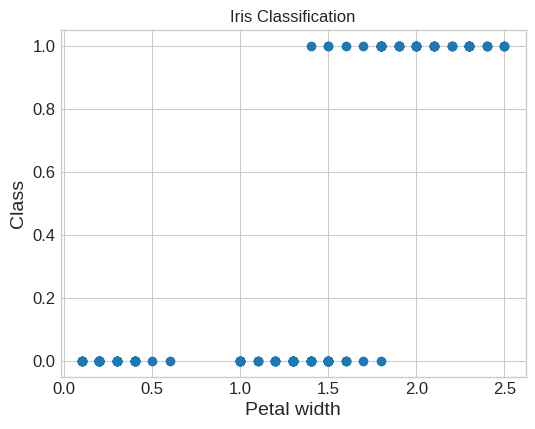

In [3]:
plt.style.use("seaborn-v0_8-whitegrid")
palette = plt.get_cmap("Set1")
plt.figure(figsize=(6, 4.5))

plt.xlabel("Petal width")
plt.ylabel("Class")
plt.title("Iris Classification")
plt.scatter(X, y)

### 1.3 划分训练集和测试集

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### 1.4 模型训练

In [5]:
from sklearn.linear_model import LogisticRegression
from time import time


model = LogisticRegression()
start_time = time()
model.fit(X_train, y_train)
end_time = time() - start_time
print(f"Training time: {end_time} seconds")

Training time: 0.004557609558105469 seconds


### 1.5 模型参数值

In [6]:
coef = model.coef_
intercept = model.intercept_
print(f"coef: {coef[0]}, intercept: {intercept}")

coef: [3.55607499], intercept: [-5.85800227]


因此，我们的模型为
$$\hat{y}=\frac{1}{\text{e}^{5.8691 - 3.562x}}$$
### 1.6 模型可视化

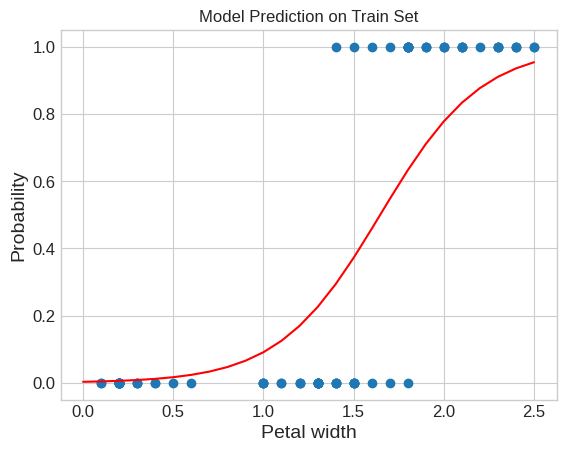

In [ ]:
plt.xlabel("Petal width")
plt.ylabel("Probability")
plt.title("Model Prediction on Train Set")
plt.scatter(X_train.reshape(-1), y_train)
x_plot = np.arange(0, 2.6, 0.1)
y_plot = 1 / (1 + np.exp(-(intercept + x_plot * coef)))
plt.plot(x_plot, y_plot.reshape(-1), color="red")

### 1.7 模型预测与评估

下面的图片展示和我们的模型的预测效果。输入值为花萼的宽度，输出的值表示概率。其中绿色实线表示是Iris virginica的概率，蓝色虚线为不是Iris virginica的概率。

Text(0, 0.5, 'Probability')

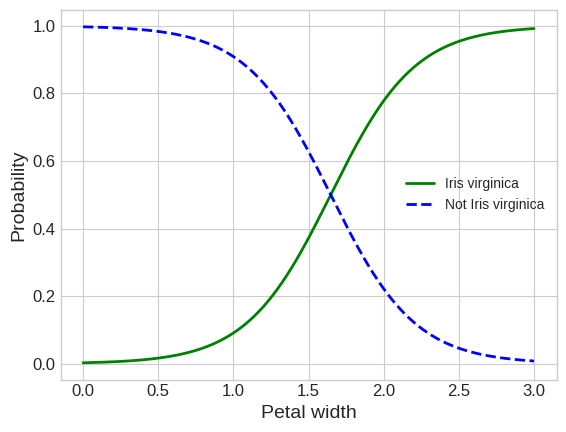

In [8]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = model.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.legend()
plt.xlabel("Petal width")
plt.ylabel("Probability")

我们将是Iris vriginica的概率大于0.5的推断都看作是输出标签1，使用 `precision_score` 和 `recall_score` 和 `f1_score` 来评估模型的准确度。

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

prec_train = precision_score(y_train, y_train_pred)
prec_test = precision_score(y_test, y_test_pred)
reca_train = recall_score(y_train, y_train_pred)
reca_test = recall_score(y_test, y_test_pred)
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)
print(
    f"Train Precision: {prec_train:0.4f}\n"
    f"Test Precision: {prec_test:0.4f}\n"
    f"Train Recall: {reca_train:0.4f}\n"
    f"Test Recall: {reca_test:0.4f}\n"
    f"Train F1: {f1_train:0.4f}\n"
    f"Test F1: {f1_test:0.4f}"
)

Train Precision: 0.9355
Test Precision: 1.0000
Train Recall: 0.9062
Test Recall: 0.9444
Train F1: 0.9206
Test F1: 0.9714


该模型在测试集的表现要好于在训练集的表现，这种“神仙算法”在样本极小的情况下是存在的，只要改变训练集和测试集的采样，结果也会随之改变。

## 2 多元逻辑斯蒂回归

### 2.1 导入数据

本节的实验依旧采用 Iris 数据集，但是数据集中选取了所有的属性。

In [10]:
from sklearn import datasets


data = datasets.load_iris()
X = data["data"]
y = data["target"]
X.shape, y.shape

((150, 4), (150,))

### 2.2 划分数据集

In [11]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### 2.3 训练模型

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 2.4 模型参数值

In [13]:
coef = model.coef_
intercept = model.intercept_
print(f"coef: {coef}, intercept: {intercept}")

coef: [[-0.38910057  0.7883318  -2.17628731 -0.93885055]
 [ 0.48015296 -0.35370492 -0.14058543 -0.74627204]
 [-0.09105239 -0.43462688  2.31687273  1.68512259]], intercept: [  8.60495037   1.81538464 -10.420335  ]


### 2.5 模型预测与评估

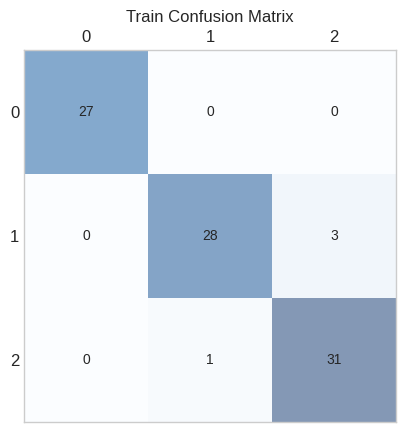

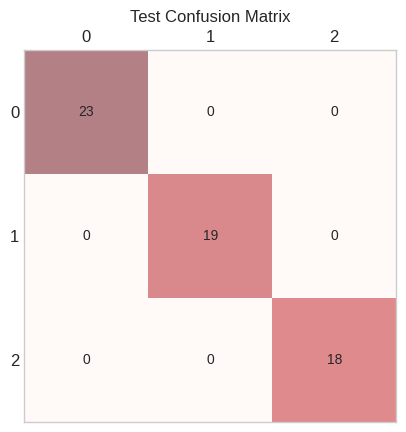

In [14]:
from sklearn.metrics import confusion_matrix

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

matrix_train = confusion_matrix(y_train, y_train_pred, labels=[0, 1, 2])
matrix_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2])

plt.matshow(matrix_train, cmap=plt.cm.Blues, alpha=0.5)
plt.title("Train Confusion Matrix")
plt.grid(False)
for i in range(matrix_train.shape[0]):
    for j in range(matrix_train.shape[1]):
        plt.text(x=j, y=i, s=matrix_train[i, j], va="center", ha="center")
plt.matshow(matrix_test, cmap=plt.cm.Reds, alpha=0.5)
plt.title("Test Confusion Matrix")
plt.grid(False)
for i in range(matrix_test.shape[0]):
    for j in range(matrix_test.shape[1]):
        plt.text(x=j, y=i, s=matrix_test[i, j], va="center", ha="center")

结果表明，该模型的预测效果很好，在测试集上达到了100%的准确率。在训练集上，Setosa的识别完全正确，有3张Versicolour被识别成了Virginica，有1张Virginica被识别成了Versicolour。